## Explore Time Series

Load python modules

In [1]:
import os, sys
import requests
import pandas as pd
from datetime import timedelta, datetime, timezone

Load Local Scripts

In [2]:
scripts_module_path = os.path.abspath(os.path.join(os.getcwd(),'..', 'scripts'))
if scripts_module_path not in sys.path:
    sys.path.append(scripts_module_path)
from acquisition import Acquisition as Akw, CONFIG

In [3]:
CONFIG.DataSources.keys()

dict_keys(['cg_asset_platforms', 'cg_supported_coins', 'cg_dai_usd', 'cg_btc_usd', 'cg_mkr_usd'])

In [3]:
cg_platforms = Akw.readDataLocally("cg_asset_platforms")
ethereum_ids = [pltf for pltf in cg_platforms if pltf["name"]=="ethereum"]
ethereum_id = (ethereum_ids[0] if len(ethereum_ids)>0 else dict())
ethereum_id

{'id': 'ethereum', 'chain_identifier': 1, 'name': 'ethereum', 'shortname': ''}

In [36]:
cg_coins = Akw.readDataLocally("cg_supported_coins",downloadIfMissing=True)

## get Dai Timeseries

In [5]:
import matplotlib.pyplot as plt

In [11]:
dt = datetime(year=2019,month=11,day=18)
timestamp_from = round(dt.replace(tzinfo=timezone.utc).timestamp())
timestamp_till = round(datetime.now().replace(tzinfo=timezone.utc).timestamp())

In [24]:
daitousd = Akw.readDataLocally(whichData="cg_dai_usd", **{"from":timestamp_from, "to":timestamp_till})

In [29]:
dai_df = pd.DataFrame(data={
    'time': list(map(lambda x: datetime.fromtimestamp(x[0] / 1000) ,daitousd["prices"])),
    'price': list(map(lambda x: x[1] ,daitousd["prices"])),
    'cap': list(map(lambda x: x[1] ,daitousd["market_caps"])),
    'volume': list(map(lambda x: x[1] ,daitousd["total_volumes"]))})
dai_df["off_peg"] = dai_df.price.apply(lambda x: abs(x-1))

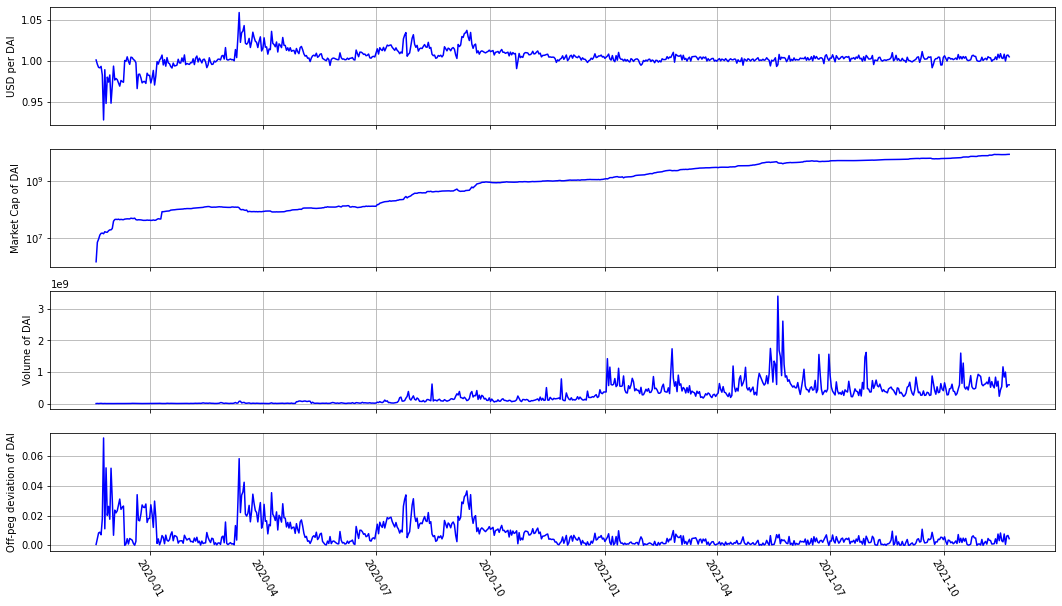

In [30]:
fig, axes = plt.subplots(nrows=4,ncols=1,sharex=True)
fig.set_figwidth(18)
fig.set_figheight(10)
axes[0].plot(dai_df["time"], dai_df["price"],'-b')
axes[0].set(ylabel="USD per DAI")
axes[0].grid()
# market capitalization
axes[1].plot(dai_df["time"], dai_df["cap"],'-b')
axes[1].set(ylabel="Market Cap of DAI")
axes[1].set_yscale('log')
axes[1].grid()
# volume
axes[2].plot(dai_df["time"], dai_df["volume"],'-b')
axes[2].set(ylabel="Volume of DAI")
axes[2].grid()
# offpeg
axes[3].plot(dai_df["time"], dai_df["off_peg"],'-b')
axes[3].set(ylabel="Off-peg deviation of DAI")
axes[3].grid()
plt.xticks(rotation=-60)
plt.show()

## Maker vs Dai

In [12]:
mkrtousd = Akw.readDataLocally(whichData="cg_mkr_usd",  **{"from":timestamp_from, "to":timestamp_till})

In [31]:
mkr_df = pd.DataFrame(data={
    'time': list(map(lambda x: datetime.fromtimestamp(x[0] / 1000) ,mkrtousd["prices"])),
    'price': list(map(lambda x: x[1] ,mkrtousd["prices"])),
    'cap': list(map(lambda x: x[1] ,mkrtousd["market_caps"])),
    'volume': list(map(lambda x: x[1] ,mkrtousd["total_volumes"]))})
# mkr_df["off_peg"] = mkr_df.cap.apply(lambda x: abs(x-1))

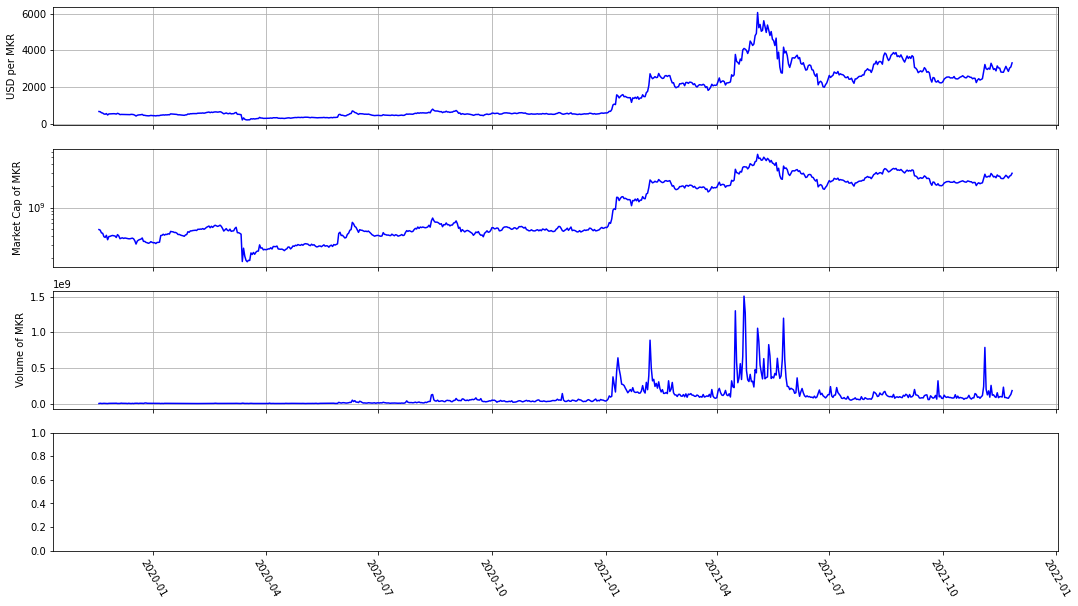

In [33]:
fig, axes = plt.subplots(nrows=4,ncols=1,sharex=True)
fig.set_figwidth(18)
fig.set_figheight(10)
axes[0].plot(mkr_df["time"], mkr_df["price"],'-b')
axes[0].set(ylabel="USD per MKR")
axes[0].grid()
# market capitalization
axes[1].plot(mkr_df["time"], mkr_df["cap"],'-b')
axes[1].set(ylabel="Market Cap of MKR")
axes[1].set_yscale('log')
axes[1].grid()
# volume
axes[2].plot(mkr_df["time"], mkr_df["volume"],'-b')
axes[2].set(ylabel="Volume of MKR")
axes[2].grid()
plt.xticks(rotation=-60)
plt.show()

## Terra USD

In [ ]:
usttousd = Akw.readDataLocally(whichData="cg_ust_usd", **{"from":timestamp_from, "to":timestamp_till})

In [37]:
df = pd.DataFrame(cg_coins)

In [38]:
df[df.symbol.str.contains('ust')]

,id,symbol,name,platforms
95,18433-faust,realtoken-s-18433-faust-ave-detroit-mi,"RealT Token - 18433 Faust Ave, Detroit, MI, 48219",{'ethereum': '0x46f8a600337dec5cab03aa9b8f67f1...
1927,busta,bust,BUSTA,{'binance-smart-chain': '0xfd0507fac1152faf870...
2686,custody-token,cust,Custody Token,{'ethereum': '0xf6abff616043c2da572573dcc583b6...
3320,dust,dust,Dust,{'ethereum': '0xe2e109f1b4eaa8915655fe8fdefc11...
3321,dust-token,dust,DUST Token,{'ethereum': '0xbca3c97837a39099ec3082df97e28c...
5229,justyours,just,JustYours,{'fantom': '0x37c045be4641328dfeb625f1dde610d0...
6506,must,must,Must,{'ethereum': '0x9c78ee466d6cb57a4d01fd887d2b5d...
8147,rug-busters,rugbust,Rug Busters,{'binance-smart-chain': '0x57bb0f40479d7dd0caa...
9029,stargazer-protocol,stardust,Stargazer Protocol,{'binance-smart-chain': '0xf647d6b49ea7bb880ec...
9383,terrausd,ust,TerraUSD,{'ethereum': '0xa47c8bf37f92abed4a126bda807a7b...
